# Face Detector
This is a simple face detector that serves as an introduction to OpenCV and deep learning. This program is intended to serve as a reference, but also a benchmark for the PYNQ board. 

References: [PyImageSearch](https://www.pyimagesearch.com)

## Face Detection Preparations  
#### Function
Load model architecture + weights → Load and blob the image → Pass the blob through the NN → Analyze the results

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
import imutils

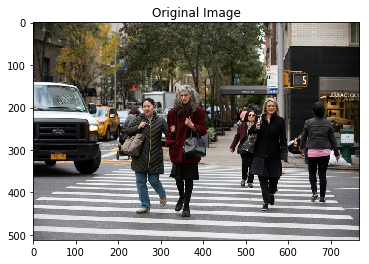

In [4]:
# Load model architecture(prototext) 
# and architecture weights (caffemodel)
nn = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt", "res10_300x300_ssd_iter_140000.caffemodel")

# Display setup
fig, ax = plt.subplots(1,1)
plt.title("Original Image")

# Import and resize Image in prep for blobbige
img = cv2.imread("test.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
(h,w) = img.shape[:2] # Returns the original h,w
img_resized = cv2.resize(img, (300,300))

# Making the Blob for OpenCV
scalefactor = 1.0
size = (500,500) #Provides the NN with the expected image size. Balance between accuracy and speed
mean_subtraction = (104.0, 177.0,123.0)
blob = cv2.dnn.blobFromImage(img_resized, scalefactor, size, mean_subtraction)

# Face Detection

Number of results    =  200


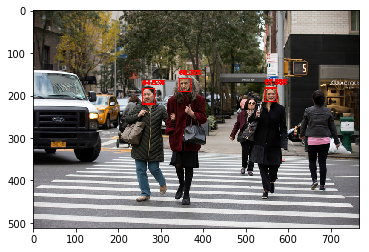

In [3]:
#Passes the img through the nn
nn.setInput(blob)      # Sets the input
results = nn.forward() # Pushes the input through

# Analyzes the results
print("Number of results    = ", results.shape[2])


#Locating and representing the results
for i in range(0,results.shape[2]):
    confidence = results[0,0,i,2];
    
    # Draws boxes if > % chance
    if confidence > 0.30:
        box = results[0,0,i,3:7] * np.array( [w,h,w,h] )
        (x_start, y_start, x_end, y_end) = box.astype("int")
        
        text = "{:.2f}%".format(confidence * 100)
        y = y_start - 10 if y_start - 10 > 10 else y_start + 10
        cv2.rectangle(img, (x_start, y_start), (x_end, y_end),
            (0, 0, 255), 2)
        cv2.putText(img, text, (x_start, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Video Face Detection

In [24]:
from imutils.video import FileVideoStream
from imutils.video import FPS
import numpy as np
import imutils
import time
import cv2

In [29]:
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import cv2
import base64

def arrayShow (imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return Image(data=encoded.decode('ascii'))

video = cv2.VideoCapture("test.mp4")

while(True):
    try:
        clear_output(wait=True)
        _, frame = video.read()
        lines, columns, _ =  frame.shape
        frame = cv2.resize(frame, (int(columns/4), int(lines/4))) 
        img = arrayShow(frame)
        display(img)
    except KeyboardInterrupt:
        video.release()

AttributeError: 'NoneType' object has no attribute 'shape'

In [12]:
help(filevideostream)

Help on module imutils.video.filevideostream in imutils.video:

NAME
    imutils.video.filevideostream - # import the necessary packages

CLASSES
    builtins.object
        FileVideoStream
    
    class FileVideoStream(builtins.object)
     |  Methods defined here:
     |  
     |  __init__(self, path, transform=None, queue_size=128)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  more(self)
     |  
     |  read(self)
     |  
     |  running(self)
     |      # Insufficient to have consumer use while(more()) which does
     |      # not take into account if the producer has reached end of
     |      # file stream.
     |  
     |  start(self)
     |  
     |  stop(self)
     |  
     |  update(self)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
 